In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import scipy.linalg
from sklearn.decomposition import PCA
import os
from matplotlib.colors import ListedColormap, Normalize
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
from scipy.interpolate import Rbf
from scipy.interpolate import griddata, Rbf, UnivariateSpline
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import LinearSegmentedColormap

from scipy.interpolate import RectBivariateSpline
from matplotlib import colors

plt.style.use('./stylesheet.mplstyle')

In [2]:
def read_data(m, U_range,orb):
    i_values = []
    ni_values = []
    
    for U in U_range:
        filename = f"./data/ni_vs_i_orb{orb}_U{U}_m{m}_4x4.txt"
        data = np.loadtxt(filename, skiprows=1)
        i = data[:, 0]
        ni = data[:, 1]
        i_values.append(i)
        ni_values.append(ni)
    return i_values, ni_values

In [3]:
filenames=os.listdir('./data')

In [4]:

mvals, uvals, orbs = [], [], []

for filename in filenames:
    if 'orb0' in filename:
        orb1_filename = filename.replace('orb0', 'orb1')

        m, u = map(float, (filename.split('_m')[1].split('_')[0], [segment[1:] for segment in filename.split('_') if segment.startswith('U')][0]))

        mvals.append(m)
        uvals.append(u)

        orb0_data = np.loadtxt(f'./data/{filename}')
        orb1_data = np.loadtxt(f'./data/{orb1_filename}')

        orbitals = np.concatenate((orb1_data[:, 1], orb0_data[:, 1]))
        #orbitals = orb1_data[:,1]-orb0_data[:,1]
        orbs.append(orbitals)

uvals=np.array(uvals)
mvals=np.array(mvals)


In [5]:
orbs = np.array(orbs)
pca = PCA(n_components=1)
principal_components = pca.fit_transform(orbs)
eigenvalues = pca.explained_variance_

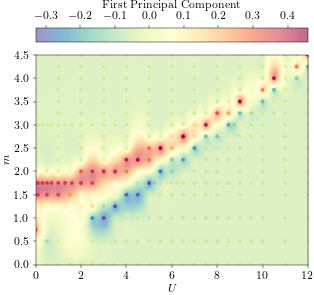

In [6]:
uvals = np.array(uvals)
mvals = np.array(mvals)


# Set the number of points for interpolation
num_points = 1000  

# Create a grid for interpolation 
u_grid, m_grid = np.meshgrid(np.linspace(min(uvals), max(uvals), num_points),
                             np.linspace(min(mvals), max(mvals), num_points))

rbf = Rbf(uvals, mvals, principal_components[:, 0], function='linear')
interp_vals = rbf(u_grid, m_grid)


normalized_values = (principal_components[:, 0] - (-0.2)) / (0.4 - (-0.2))

plt.imshow(interp_vals, extent=(min(uvals), max(uvals), min(mvals), max(mvals)),
           origin='lower', cmap='Spectral_r', aspect='auto', alpha=0.6)
plt.colorbar(label="First Principal Component",location='top')
plt.xlabel(r'$U$')
plt.scatter(uvals, mvals, c=normalized_values, cmap='Spectral_r', marker='o', s=3, alpha=1)
plt.ylabel(r'$m$')

plt.savefig('PCAphasediagramBHZ.svg')
plt.savefig('PCAphasediagramBHZ.pdf')
plt.show()
